In [ ]:
def bland_altman_plot(data1, data2, ylabel, *args, **kwargs):
    """
    Create a Bland-Altman plot.

    Parameters:
        data1 (array-like): First set of data (e.g., expert scores).
        data2 (array-like): Second set of data (e.g., AI scores).
        *args, **kwargs: Additional arguments and keyword arguments to pass to plt.scatter().

    Returns:
        None
    """
    mean = (data1 + data2) / 2
    diff = data1 - data2
    
    plt.figure(figsize=(8, 6))
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(diff.mean(), color='red', linestyle='--')
    plt.xlabel('Mean of Scores')
    plt.ylabel(ylabel)
    plt.title('Bland-Altman Plot')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming data1 and data2 are arrays/lists of expert and AI scores respectively
# Replace data1 and data2 with your actual data


col1 = 'Experts_Avg'
col2 = 'Model Total'

bland_altman_plot(model_groupB_df[col1], model_groupB_df[col2], color='blue', alpha=0.5, 
                  ylabel='Difference (Expert - AI)')


In [ ]:

col1 = 'Expert1'
col2 = 'Expert2'
bland_altman_plot(model_groupB_df[col1], model_groupB_df[col2], color='blue', alpha=0.5,
                  ylabel='Difference (Expert1 - Expert2)')

In [ ]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
data = model_groupB_df['Experts_Avg']
fig = sm.qqplot(data, line='45')
plt.show()

In [ ]:
import os
import sys

sys.path.append(".")  # Add the parent directory of LLM_Evaluations to the Python path
from Trying_statistics_plots_analysis_utils import *

experts_file = "../../../Videos_and_DISCERN_data/filtered_experts_scores.csv"
# experts_file = "../../../Videos_and_DISCERN_data/diabetes_experts_scores.csv"
experts_df = pd.read_csv(experts_file)

print(experts_df.shape)
print(experts_df['Topic'].value_counts())
experts_df.head(2)

(276, 35)
Topic
Nocturnal Enuresis     57
Cluster Headache       54
Trigger Finger         44
Spina Bifida           36
Pudendal Nerve         35
Delayed Ejaculation    25
Flat Feet              25
Name: count, dtype: int64


,Video ID,Topic,Expert1,Expert2,Experts_Avg,Expert1 Q1,Expert1 Q2,Expert1 Q3,Expert1 Q4,Expert1 Q5,...,Expert2 Q6,Expert2 Q7,Expert2 Q8,Expert2 Q9,Expert2 Q10,Expert2 Q11,Expert2 Q12,Expert2 Q13,Expert2 Q14,Expert2 Q15
0,OWtlKJbg_Pc,Nocturnal Enuresis,2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95T3ABnnhOs,Nocturnal Enuresis,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
for idx, row in experts_df.iterrows():
    video_id = row['Video ID']
    # if row['Topic'] == 'Trigger Finger':
    for q_num in range(1, 16):
        expert1_score = row[f'Expert1 Q{q_num}']
        expert2_score = row[f'Expert2 Q{q_num}']
        if pd.notna(expert1_score) and pd.notna(expert2_score):
            diff = abs(expert1_score - expert2_score)
            if diff > 2:
                print(diff, idx, video_id, 'Question:', q_num)


3.0 12 BdySBDyziw8 Question: 1
3.0 31 SGC3Ykuc5v0 Question: 8


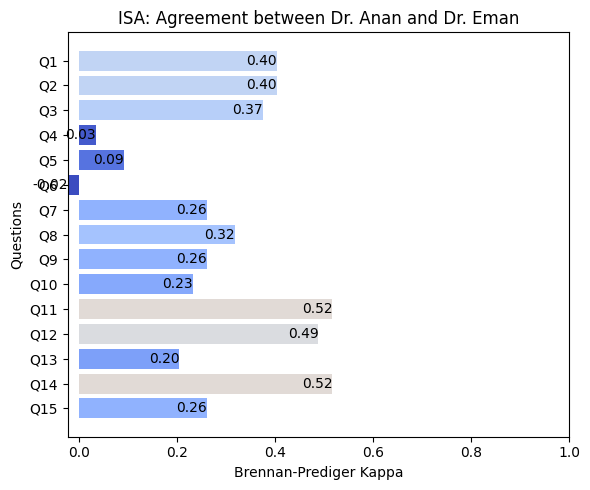

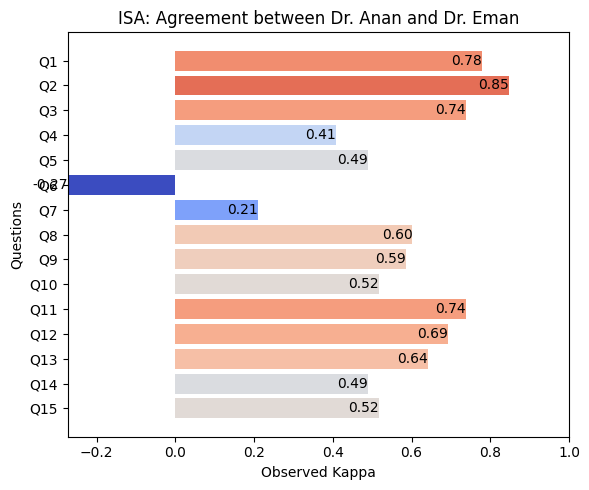

In [30]:
questionwise_agreement(experts_df, EXPERT1_COLUMNS, EXPERT2_COLUMNS, 'Dr. Anan', 'Dr. Eman', 'ISA', "Brennan-Prediger Kappa")
questionwise_agreement(experts_df, EXPERT1_COLUMNS, EXPERT2_COLUMNS, 'Dr. Anan', 'Dr. Eman', 'ISA', "Observed Kappa")

In [ ]:
for idx, row in experts_df.iterrows():
    video_id = row['Video ID']
    for q_num in range(1, 16):
        expert1_score = row[f'Expert1 Q{q_num}']
        expert2_score = row[f'Expert2 Q{q_num}']
        if pd.notna(expert1_score) and pd.notna(expert2_score):
            diff = abs(expert1_score - expert2_score)
            if diff > 1:
                print(diff, idx, video_id, 'Question:', q_num)
                
print("Mean Difference:", mean_diff)

In [12]:
def text_to_array(text):
    # Split the text by newlines and convert each part to an integer
    array = [int(line) for line in text.strip().split('\n')]
    return array

e1 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
e2 = [5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4]

In [16]:
import numpy as np

def confusion_matrix(rater1, rater2, categories):
    """
    Construct a confusion matrix from two arrays of ratings.
    
    Parameters:
        rater1 (list or numpy.ndarray): Ratings from the first rater.
        rater2 (list or numpy.ndarray): Ratings from the second rater.
        categories (list): List of unique categories.
        
    Returns:
        numpy.ndarray: Confusion matrix.
    """
    n_categories = len(categories)
    matrix = np.zeros((n_categories, n_categories), dtype=int)
    
    for a, b in zip(rater1, rater2):
        i = categories.index(a)
        j = categories.index(b)
        matrix[i, j] += 1
        
    return matrix

def gwet_ac2_from_ratings(rater1, rater2, categories, weights='linear'):
    """
    Calculate Gwet's AC2 from two arrays of ratings.
    
    Parameters:
        rater1 (list or numpy.ndarray): Ratings from the first rater.
        rater2 (list or numpy.ndarray): Ratings from the second rater.
        categories (list): List of unique categories.
        weights (str or numpy.ndarray, optional): Either 'linear' for linear weights, 'quadratic' for quadratic weights, or provide a custom weighting matrix.
        
    Returns:
        float: Gwet's AC2 statistic.
    """
    matrix = confusion_matrix(rater1, rater2, categories)
    return gwet_ac2(matrix, weights)

def gwet_ac2(ratings, weights='linear'):
    """
    Calculate Gwet's AC2 statistic.

    Parameters:
        ratings (numpy.ndarray): An NxN matrix representing the observed frequencies of each category.
        weights (str or numpy.ndarray, optional): Either 'linear' for linear weights, 'quadratic' for quadratic weights, or provide a custom weighting matrix.

    Returns:
        float: Gwet's AC2 statistic.
    """
    n = ratings.sum()

    if weights == 'linear':
        weights_matrix = np.ones((len(ratings), len(ratings)))
        for i in range(len(ratings)):
            for j in range(len(ratings)):
                weights_matrix[i][j] = abs(i - j)
    elif weights == 'quadratic':
        weights_matrix = np.ones((len(ratings), len(ratings)))
        for i in range(len(ratings)):
            for j in range(len(ratings)):
                weights_matrix[i][j] = (i - j) ** 2
    else:
        weights_matrix = weights

    row_marginal = np.sum(ratings, axis=1)
    col_marginal = np.sum(ratings, axis=0)

    expected = np.outer(row_marginal, col_marginal) / n

    observed_agreement = np.sum(weights_matrix * ratings) / n
    expected_agreement = np.sum(weights_matrix * expected) / n

    ac2 = 1 - (observed_agreement / expected_agreement)

    return ac2

# Example usage:
categories = [1, 2, 3, 4, 5]

ac2 = gwet_ac2_from_ratings(e1, e1, categories)
print("Gwet's AC2:", ac2)


Gwet's AC2: 0.37254901960784315
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  5 26]]


In [25]:
import numpy as np

def brennan_prediger_kappa(rater1, rater2, categories):
    """
    Calculate Brennan and Prediger's Kappa from two arrays of ratings.
    
    Parameters:
        rater1 (list or numpy.ndarray): Ratings from the first rater.
        rater2 (list or numpy.ndarray): Ratings from the second rater.
        categories (list): List of unique categories.
        
    Returns:
        float: Brennan and Prediger's Kappa.
    """
    assert len(rater1) == len(rater2), "The two rating arrays must have the same length"
    
    n = len(rater1)
    k = len(categories)
    
    # Count the observed agreement
    observed_agreement = sum(a == b for a, b in zip(rater1, rater2))
    
    # Calculate expected agreement under uniform distribution
    expected_agreement = n / k
    
    # Calculate Brennan and Prediger's Kappa
    kappa = (observed_agreement - expected_agreement) / (n - expected_agreement)
    
    return kappa

# Example usage:
rater1 = [1, 2, 3, 4, 1, 2, 3, 4]
rater2 = [1, 2, 3, 4, 2, 2, 3, 4]
categories = [1, 2, 3, 4]

kappa = brennan_prediger_kappa(e1, e2, range(1,6))
print("Brennan and Prediger's Kappa:", kappa)


Brennan and Prediger's Kappa: 0.765625


In [56]:
import numpy as np

def bag_s(ratings1, ratings2, k):
    n = len(ratings1)
    
    # Count agreement on each category
    agreements = sum(1 for r1, r2 in zip(ratings1, ratings2) if r1 == r2)
    
    # Calculate expected agreement by chance
    p = 1 / k  # Probability of agreement by chance
    expected_agreements = n * p
    
    # Calculate BAG's S
    bag_s = (agreements - expected_agreements) / (n - expected_agreements)
    
    return bag_s

# Calculate BAG's S
bag_s_value = bag_s(e1, e2, 5)

print("Bennett, Alpert, and Goldstein's S:", bag_s_value)


Bennett, Alpert, and Goldstein's S: 0.765625


In [9]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(e1, e2)
print(rmse/4)

0.10825317547305482


In [19]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient
spearman_rho, _ = spearmanr(e1, e2, )

print("Spearman's Rank Correlation Coefficient (ρ):", spearman_rho)



Spearman's Rank Correlation Coefficient (ρ): 0.44444444444444436


In [6]:
stat_dict = calculate_statistics(experts_df, 'Expert1 Q6', 'Expert2 Q6')
stat_dict

{'Wilcoxon signed-rank test p-value': 0.014305878435429648,
 'Paired t-test p-value': 0.011833505370244466,
 'ICC3': 0.4222222222222222,
 'CCC': 0.36223862238622384,
 'Weighted Kappa': 0.37254901960784315}

In [53]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix

# Define the two sets of ratings
e1 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
e2 = [5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4]

# cohen_kappa = cohen_kappa_score(e1, e2, weights=None, labels=range(1,6))
# weighted_kappa_linear = cohen_kappa_score(e1, e2, weights='linear', labels=range(1,6))
weighted_kappa_quadratic = cohen_kappa_score(e1, e2, weights='quadratic', labels=range(1,6))

# print("Cohens Kappa:", round(cohen_kappa, 2))
# print("Weighted Kappa Linear:", round(weighted_kappa_linear, 2))
print("Weighted Kappa Quadratic:", round(weighted_kappa_quadratic, 2))

conf_matrix = confusion_matrix(e1, e2, labels=range(1,6))
print("Confusion Matrix:\n", conf_matrix)

Weighted Kappa Quadratic: 0.37
Confusion Matrix:
 [[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  5 26]]


Mean Difference: 0.1875
Mean Difference as a Percentage: 4.6875


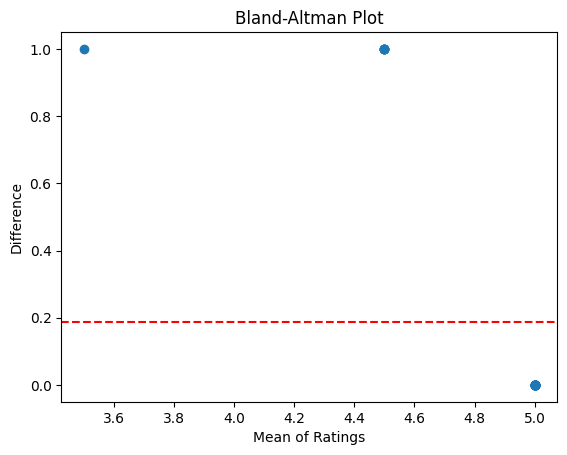

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two sets of ratings
e1 = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
e2 = np.array([5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4])

# Calculate mean difference
mean_diff = np.mean(e1 - e2)
print("Mean Difference:", mean_diff)

max_diff = np.max(np.abs(e1 - e2))

# Convert mean difference to percentage of maximum possible difference
mean_diff_percent = (mean_diff / 4) * 100

print("Mean Difference as a Percentage:", mean_diff_percent)
# Bland-Altman Plot
mean_ratings = (e1 + e2) / 2
diff = e1 - e2
plt.scatter(mean_ratings, diff)
plt.axhline(mean_diff, color='r', linestyle='--')
plt.xlabel('Mean of Ratings')
plt.ylabel('Difference')
plt.title('Bland-Altman Plot')
plt.show()


In [21]:
from irr import ac1

# Example ratings from two raters
rater1 = [1, 1, 2, 2, 3]
rater2 = [1, 2, 2, 2, 3]

# Combine ratings into a list of lists
ratings = [e1, e1]

# Compute Gwet’s AC1
ac1_score = ac1(ratings)

print("Gwet’s AC1:", ac1_score)


ImportError: cannot import name 'ac1' from 'irr' (c:\Users\ku500989\AppData\Local\Programs\Python\Python312\Lib\site-packages\irr\__init__.py)

In [28]:
import numpy as np

def gwet_ac2_with_missing(rater1, rater2, categories, weight="linear"):
  """
  Calculates Gwet's AC2 coefficient for agreement between two raters, handling missing data.

  Args:
      rater1 (list): List of ratings from rater 1.
      rater2 (list): List of ratings from rater 2.
      categories (list): List of possible categories.
      weight (str, optional): Weighting scheme ("linear" or "quadratic"). Defaults to "linear".

  Returns:
      float: Gwet's AC2 coefficient.
  """

  n = len(rater1)  # Number of ratings

  # Check if ratings have the same length
  if len(rater1) != len(rater2):
    raise ValueError("Ratings lists must have the same length")

  # Count agreement matrix with missing category
  num_categories = len(categories)
  agreement_matrix = np.zeros((num_categories, num_categories))
  for i in range(n):
    if rater1[i] is not None and rater2[i] is not None:
      agreement_matrix[rater1[i] - 1, rater2[i] - 1] += 1
    else:
      # Increment count for missing category (diagonal element)
      agreement_matrix[num_categories - 1, num_categories - 1] += 1

  # Calculate marginal totals including missing category
  marginal_totals = np.sum(agreement_matrix, axis=0) + np.sum(agreement_matrix, axis=1) - np.diag(agreement_matrix)
  marginal_totals = np.append(marginal_totals, np.sum(agreement_matrix[:, -1]))  # Add missing category total

  # Calculate agreement probability under chance
  chance_agreement = np.outer(marginal_totals / (n + 1), marginal_totals / (n + 1))

  # Calculate weights based on weighting scheme
  if weight == "linear":
    weights = np.ones((num_categories, num_categories))
  elif weight == "quadratic":
    weights = np.abs(np.subtract.outer(np.arange(num_categories), np.arange(num_categories)))
  else:
    raise ValueError("Invalid weight type. Choose 'linear' or 'quadratic'.")

  # Reshape weights for broadcasting
  weights = weights[:-1, :-1]  # Remove the last row and column for missing category
  weights = weights.reshape(weights.shape[0], 1, weights.shape[1])  # Reshape to (5, 1, 5)

  # Calculate numerator and denominator
  numerator = np.sum(weights * (agreement_matrix - chance_agreement))
  denominator = np.sum(weights * (marginal_totals[:, np.newaxis] - chance_agreement)) - np.sum(chance_agreement)

  # Gwet's AC2 coefficient
  ac2 = (numerator / denominator) if denominator != 0 else 0

  return ac2

# Example usage
rater1 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
rater2 = [5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4]
categories = [1, 2, 3, 4, 5]

ac2 = gwet_ac2_with_missing(rater1, rater2, categories, weight="quadratic")
print(f"Gwet's AC2 (linear weights): {ac2}")

ValueError: operands could not be broadcast together with shapes (5,5) (6,6) 